Exploring Kaggle Diabetic Retinopathy datasets

Reference:
- https://www.kaggle.com/c/diabetic-retinopathy-detection

In [17]:
import pandas as pd
from glob import glob
import os
import cv2
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

input_path = "../input/"

def load_df(path):    
    def get_filename(image_id):
        return os.path.join(input_path, "train", image_id + ".jpeg")

    df_node = pd.read_csv(path)
    df_node["file"] = df_node["image"].apply(get_filename)
    df_node = df_node.dropna()
    
    return df_node

df = load_df(os.path.join(input_path, "trainLabels.csv"))
len(df)

35126

In [18]:
df.head()

,image,level,file
0,10_left,0,../input/train/10_left.jpeg
1,10_right,0,../input/train/10_right.jpeg
2,13_left,0,../input/train/13_left.jpeg
3,13_right,0,../input/train/13_right.jpeg
4,15_left,1,../input/train/15_left.jpeg


### Class imbalance

In [10]:
Counter(df['level'])

Counter({0: 25810, 1: 2443, 2: 5292, 3: 873, 4: 708})

(array([ 25810.,   2443.,   5292.,    873.,    708.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ]),
 <a list of 5 Patch objects>)

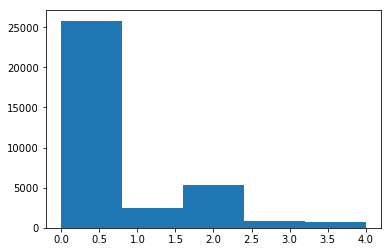

In [9]:
plt.hist(df['level'], bins=5)

### Examples

In [43]:
import math

def get_filelist(level=0):
    return df[df['level'] == level]['file'].values

def subplots(filelist):
    plt.figure(figsize=(16, 12))
    ncol = 4
    nrow = math.ceil(len(filelist) // ncol)
    
    for i in range(0, len(filelist)):
        plt.subplot(nrow, ncol, i + 1)
        img = cv2.imread(filelist[i])
        plt.imshow(img)

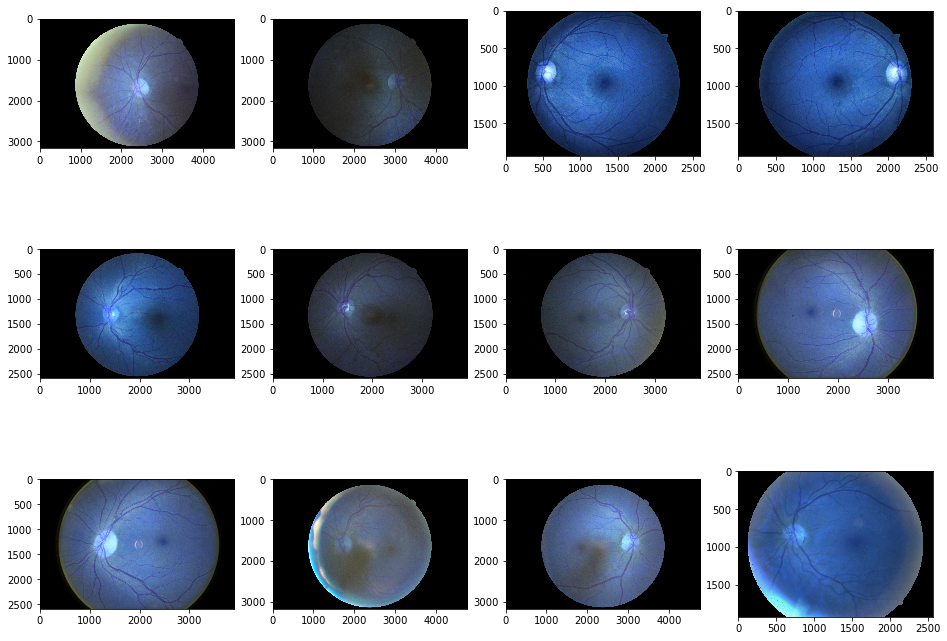

In [44]:
filelist = get_filelist(level=0)
subplots(filelist[:12])

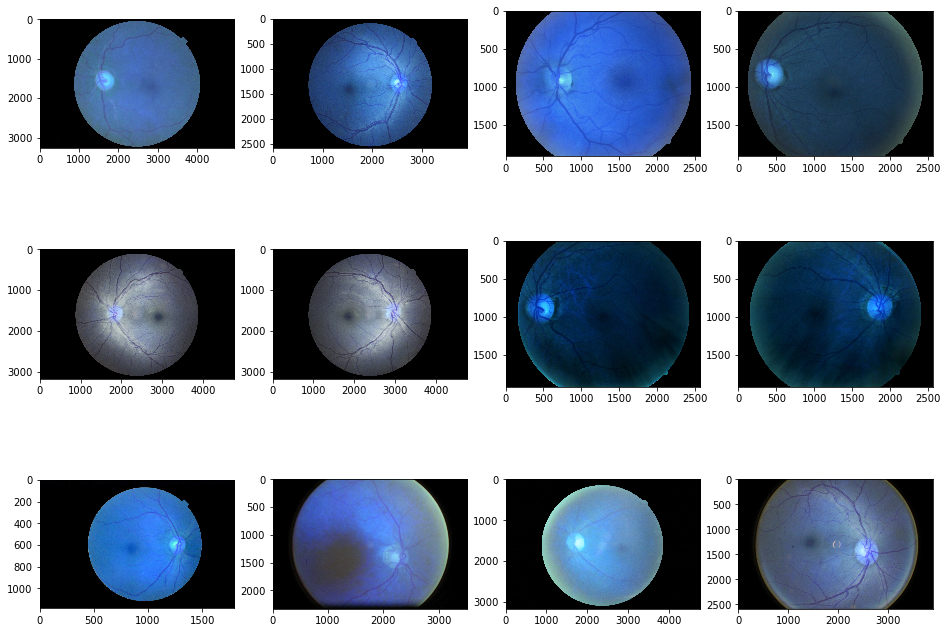

In [48]:
filelist = get_filelist(level=1)
subplots(filelist[:12])

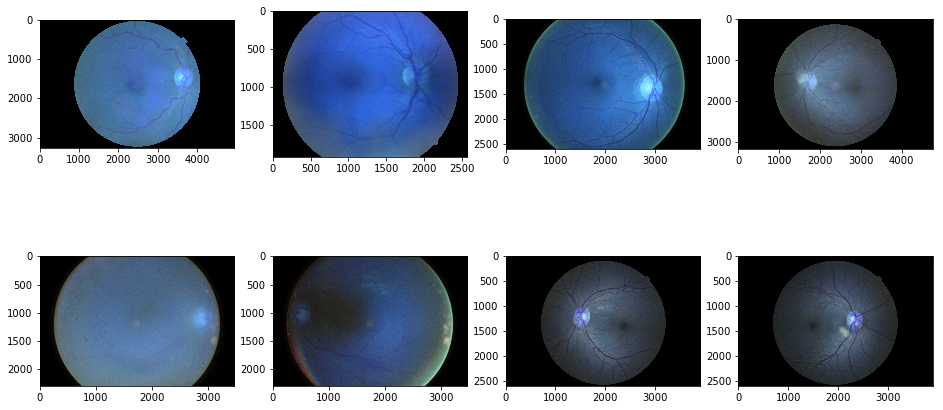

In [38]:
filelist = get_filelist(level=2)
subplots(filelist[:12])

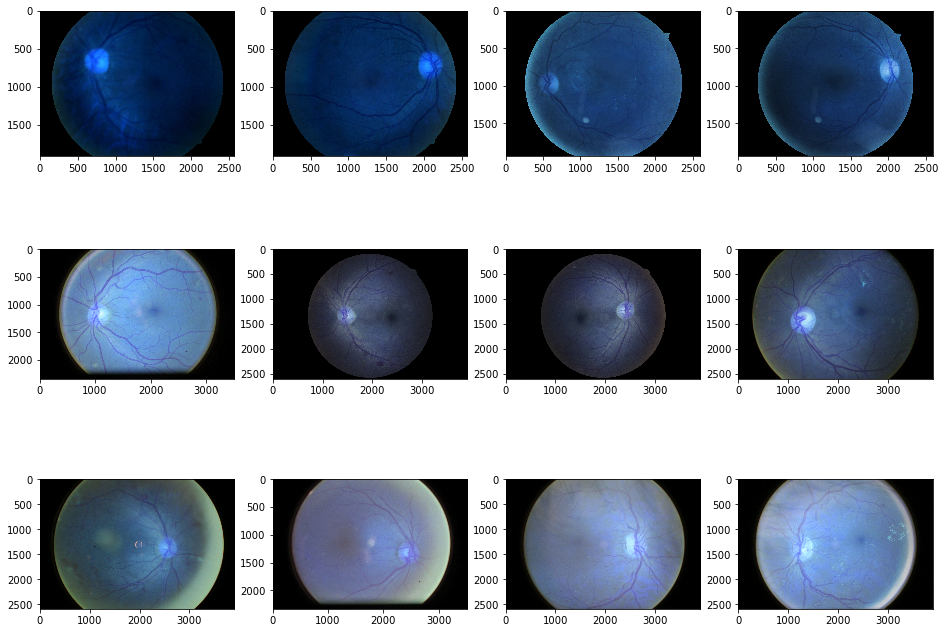

In [46]:
filelist = get_filelist(level=3)
subplots(filelist[:12])

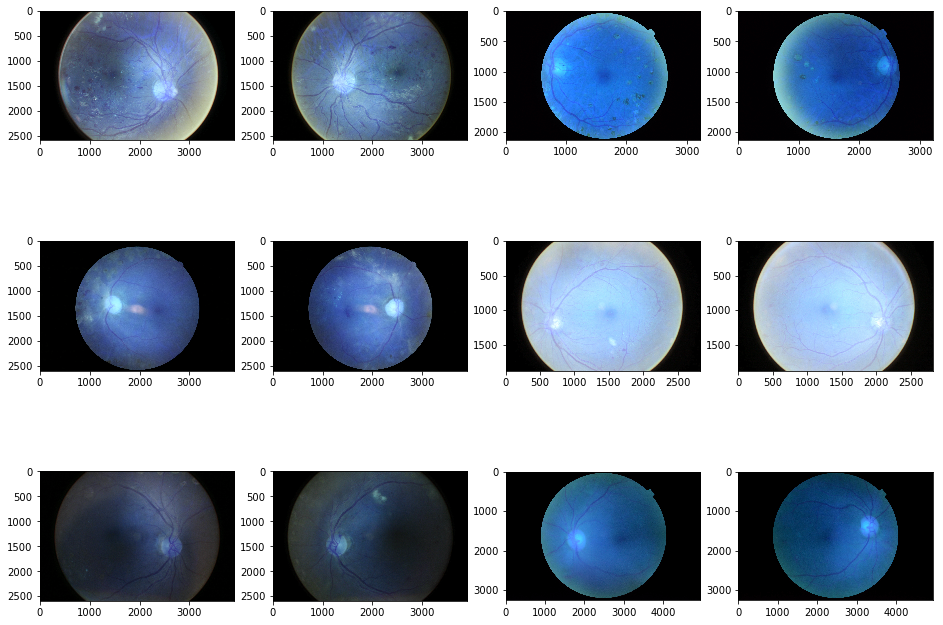

In [47]:
filelist = get_filelist(level=4)
subplots(filelist[:12])